In [21]:
import datacube
from datacube.storage.masking import mask_invalid_data
from datacube.api.query import Query
dc = datacube.Datacube()

In [22]:
def getRegion(l) :
#nwt   1         # burn before and after 
#vi    2         # coastal area
#hvm   3         # copper mine
#fmm   4         # oil sands
#pet   5         # research forest
#glc   6         # athabasca glaciers
    if l == 1 :
        lat = (62.3768, 63.3062)
        lon = (-114.7038, -112.3989)
    elif l == 2 :
        lat = (47.9432, 49.4273)
        lon = (-123.7845, -121.2920)
    elif l == 3 :
        lat = (49.7178, 50.8349)
        lon = (-121.6712, -119.7794)
    elif l == 4 :
        lat = (56.7849, 57.8174)
        lon = (-112.1411, -110.0301)
    elif l == 6 :
        lat = (51.1364, 52.2393)
        lon = (-117.9841, -116.0518)
    else :
        lat = (45.4499, 46.6034)
        lon = (-78.4944, -76.7130)
    return (lat, lon)

In [23]:
def getBands(p) :    
    prd = p[:4]
    
    if prd == 'LE07' :
        bands = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'panchromatic', 'quality']    
    elif prd == 'LM05' :
        bands = ['green', 'red', 'nir1', 'nir2', 'quality']    
    elif prd == 'LT05' :    
        bands = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'quality']    
    elif prd == 'LM03' :
        bands = ['green', 'red', 'nir1', 'nir2', 'quality']        
    elif prd == 'LC08' : 
        bands = ['coastal_aerosol', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'panchromatic', 'cirrus', 'lwir1', 'lwir2', 'quality']
    return bands

In [24]:
# Prepare the DB query
def buildQuery(p, r, g, b, t1, t2, l) :    

    lat, lon = getRegion(l)

    bands = getBands(p)
    
    query = { 
        'product' : p
        , 'latitude' : lat
        , 'longitude' : lon
        , 'measurements' : [ bands[r], bands[g], bands[b] ]
        , 'resolution' : (-0.0025, 0.0025)
    }

    if (t1 != '') and (t2 != '') :
        query['time'] = (t1, t2)
    
    return query

In [25]:
# Using the dataset, make an rgb plot
def plotRGB(data) :

    fake_saturation = 400000

    # Sets all `nodata` values to ``nan``.
    data = mask_invalid_data(data)

    # Isolate the color dimension in an xarray.DataArray, use transpose to make color the last dimension
    rgb = (data.to_array(dim='color'))
    rgb = rgb.transpose(*(rgb.dims[1:]+rgb.dims[:1])) 

    # Filter out pixels where any band is 'saturated'
    rgb = rgb.where((rgb <= fake_saturation).all(dim='color'))

    # Scale to [0, 1] range for imshow
    rgb /= fake_saturation
    return rgb

In [51]:
# Select a product
product = 'LC08_scene'

# Select band combination
red = 4
green = 3
blue = 2

red, green, blue = map(lambda x: x - 1,[red, green, blue])

# Select a prepared region
#nwt   1         # burn before and after 
#vi    2         # coastal area
#hvm   3         # copper mine
#fmm   4         # oil sands
#pet   5         # research forest
#glc   6         # athabasca glaciers

region = 6

# Select time start and end
start = ''
end = ''

In [52]:
query = buildQuery(product, red, green, blue, start, end, region)
data = dc.load( **query)
rgb = plotRGB(data)

['coastal_aerosol', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'panchromatic', 'cirrus', 'lwir1', 'lwir2', 'quality']


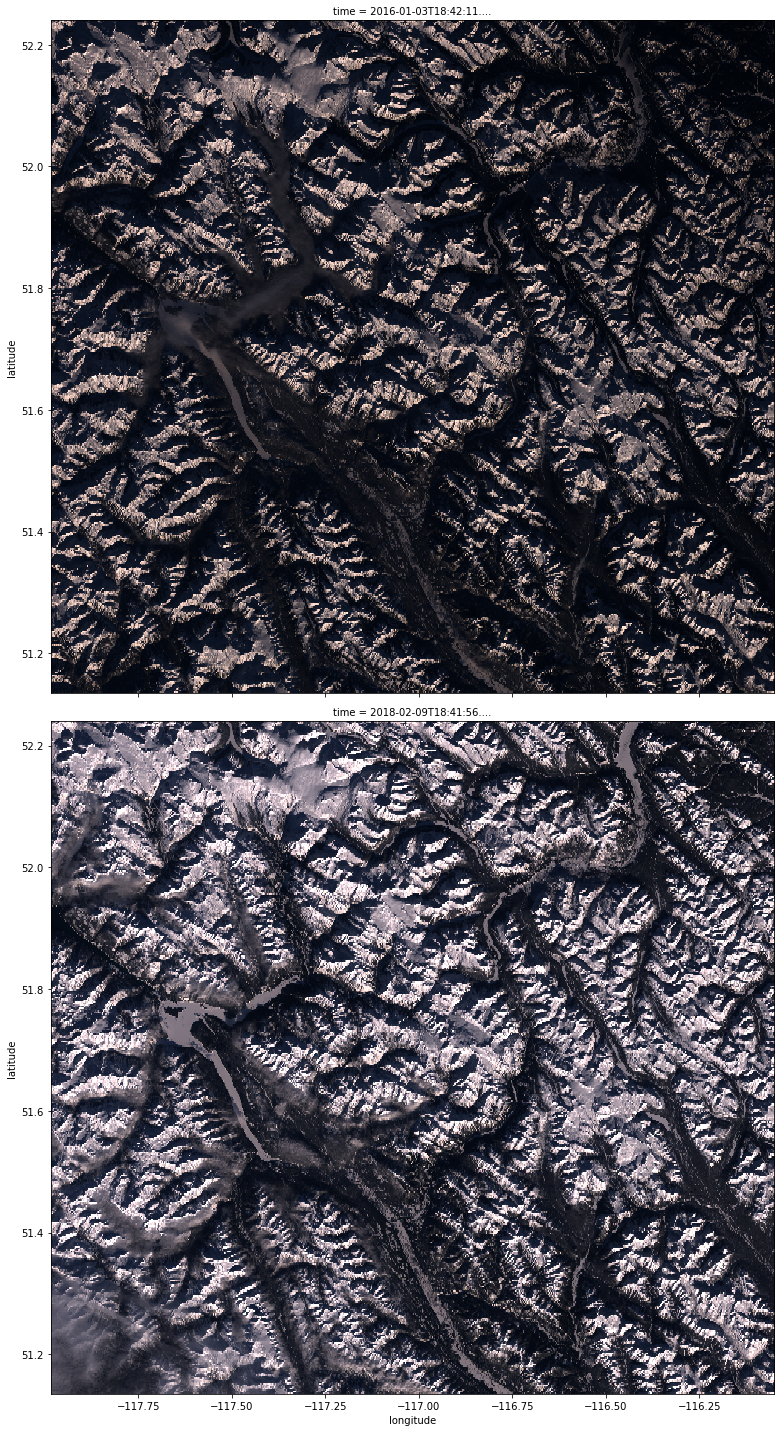

In [53]:
rgb.plot.imshow( x = data.crs.dimensions[1], y = data.crs.dimensions[0], col = 'time', col_wrap = 1 , size = 10, add_colorbar = False)

In [42]:
#dc.find_datasets(product = 'LC08_caea')

In [47]:
#data